<a href="https://colab.research.google.com/github/matteoalberti/Lectures_introUML_Experis2020/blob/main/Dimensionality_Reduction/Day3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction to Autoencoder

   Email: m.alberti@deeplearningitalia.com

   Linkedin:
   [linkedin_matteo_alberti](www.linkedin.com/in/matteo-alberti-695570110)

# Summary

- <font color=BE3315>**Brief Recap** </font> 
- <font color=C24024>**AutoEncoder [AE] Overview** </font> 
- <font color=CA4A2F>**Information Theory Notes** </font>

- <font color=E15234>**[AE] Use Cases** </font> 

- <font color=E35F2A>**Variational AutoEncoder [V-AE]** </font>

# Brief Recap

### Principal Component Analysis


**Step-by-Step**

In [67]:
import tensorflow as tf
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

In [54]:
X = np.random.randint(4,size=(4,4));X

array([[2, 2, 1, 2],
       [1, 3, 0, 3],
       [3, 1, 1, 0],
       [3, 2, 3, 1]])

In [57]:
#Standardize
X_scal = StandardScaler().fit_transform(X); X_scal

array([[-0.30151134,  0.        , -0.22941573,  0.4472136 ],
       [-1.50755672,  1.41421356, -1.14707867,  1.34164079],
       [ 0.90453403, -1.41421356, -0.22941573, -1.34164079],
       [ 0.90453403,  0.        ,  1.60591014, -0.4472136 ]])

*Covariance measures how two features vary with each other*

 For two feature vectors $x_{j}$  and $x_{k}$ the covariance between them $\sigma_{jk}$ can be calculated using the following equation:

<img src="https://www.oreilly.com/library/view/r-statistics-cookbook/9781789802566/assets/76a7f6ab-d154-4882-87cd-bfc020566108.png" width="300">


<img src="https://freedomtowin.github.io/non_gauss_images/output_0.png" width="300">


While our features were standardize :

$$ \sum = \frac{1}{n-1} X^T X $$


In [78]:
#Computing the covariance matrix

cov = np.cov(X_scal); cov

array([[ 0.11392956,  0.43994057, -0.2878807 , -0.26598942],
       [ 0.43994057,  2.46198514, -1.615942  , -1.28598371],
       [-0.2878807 , -1.615942  ,  1.19614926,  0.70767344],
       [-0.26598942, -1.28598371,  0.70767344,  0.84429969]])

In [59]:
cov.shape

(4, 4)

### Eigendecomposition

- The **eigenvectors** represent the principal components (**the directions of maximum variance**) of the covariance matrix

- The **eigenvalues** are their corresponding **magnitude**


*Eingenvectors and Eingenvalues are related :*

$$Σv=λv$$



In [79]:
# Eigendecomposition

eigvals, eigvects = np.linalg.eig(cov)

In [61]:
print(eigvals.shape, eigvects.shape)

(4,) (4, 4)


In [80]:
eigvals

array([ 4.28435889e+00,  2.94681396e-01,  3.73233718e-02, -5.81049032e-17])

In [81]:
eigvects

array([[ 0.13967687,  0.10937857, -0.84765954,  0.5       ],
       [ 0.75703446,  0.00671428,  0.42053983,  0.5       ],
       [-0.50004513,  0.64240075,  0.29542537,  0.5       ],
       [-0.3966662 , -0.75849359,  0.13169434,  0.5       ]])

### Select the number of components

Sort EingenVects based on Magnitude of our EigenVals

In [82]:
idx = np.argsort(eigvals, axis=0)[::-1]
sorted_eig_vectors = eigvects[:, idx]

**How can we choose the number of components?**

*plotting the cumulative sum of the eigenvalues*

$$ \frac{λ_j}{\sum_{j=1}^d λ_j} $$



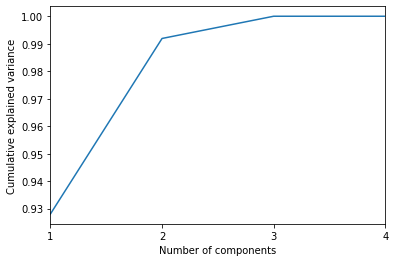

In [83]:
cumsum = np.cumsum(eigvals[idx]) / np.sum(eigvals[idx])
xint = range(1, len(cumsum) + 1)
plt.plot(xint, cumsum)
plt.xlabel("Number of components")
plt.ylabel("Cumulative explained variance")
plt.xticks(xint)
plt.xlim(1, 4, 1)
plt.show()

### Transform data into the subspace

$$Z=XW$$





In [84]:
Z = np.dot(X_scal, sorted_eig_vectors[:, :2]); Z

array([[-0.10479046, -0.51956436],
       [ 0.90144513, -1.9099091 ],
       [-0.29736414,  0.95969031],
       [-0.49929054,  1.46978315]])

## Autoencoder Overview

Autoencoders are unsupervised neural networks that aim to copy their inputs to their outputs. They work by compressing the input into a **latent-space representation**, and then reconstructing the output from this representation. 


![](https://hackernoon.com/hn-images/1*8ixTe1VHLsmKB3AquWdxpQ.png)

- The **latent vector** is the essence of the autoencoder;

- The encoder and the decoder could be composed by any kind of layers. We will se a CNN-autoencoder;

**Encoder:** This is the part of the network that compresses the input into a latent-space representation. It can be represented by an encoding function 

### $$h=f(x).$$

**Decoder**: This part aims to reconstruct the input from the latent space representation. It can be represented by a decoding function 

### $$r=g(h).$$


The autoencoder as a whole can thus be described by the function 

### $$g(f(x)) = r.$$ 

where $r$ is called **reconstruction**. By training the autoencoder to copy the input to the output ($r$ as close as the original input $x$), the latent representation $h$ will take on useful properties. For instance, if the dimension of $h$ is smaller than $x$ we can construct a representation of the input which is compressed. This forces the autoencoder to learn the most salient features of the training data (a sort of PCA).

References:
- [Gradient-based learning applied to document recognition](http://yann.lecun.com/exdb/publis/pdf/lecun-01a.pdf). Y. LeCun, L. Bottou, Y. Bengio, and P. Haffner. Proceedings of the IEEE, 86(11):2278-2324, November 1998.

## Applications of Autoencoders

- **Dimensional Reduction**: throw away the output and extract the compressed layer. We can now build a new dataset with lower dimensionality;
- **Seq2Seq**: Sequence to Sequence models (language translation, for instance) have an encoder-decoder structure;
- **Time-Series-Forecasting** : Dimensionality reduction tool working with other models (LSTM | GRU )
- **Denoising**: the input is an image with some noise added. The loss function is setted to minimize the difference between the reconstructed image and the original noise-free image.
- **...**


#### Next Steps
    
- A bit of Mathematics (*less than yesterday*)
- Understand basic Autoencoder *in different scenarios*

**Next Goal**
- Achieve the **State-of-the-Art**

## <h1><center>  Information Theory Background 


### Self-Information

The idea behind self-information is the following

* **if an event always occurs, we associate it with a smaller amount of information. It will not suprise us!**
* **On the other side, a rare event is associated with a huge amount of information. It will suprise us!**

I am not surprise to see the sunrise every morning (likely event). Instead,  I would be really suprised if tomorriw the Sun will not rise (unlikely event). This amount of surprise or self-information of the event $x$ is quantified by

$$I(x) = - \log p(x),$$

where $p(x)$ is the probability of the event $x$. If $p(x)=1$, then self-info is zero. A rare event instead has a huge surpise factor.

### Shannon Entropy 

In terms of self-info, **Shannon Entropy** is the is the average self-information (**expected value**) over all possible values of X.
The entropy for a probability $p(x)$ distribution is

$$ S = - \sum_i p(x_i) \log p(x_i),$$

where we assume we know the probability $p$ for each outcome $i$. If we use $log_2$  for our calculation we can **interpret entropy as *the minimum number of bits it would take us to encode our information*.**

For continous variables, we can use the integral form

$$ S = - \int  p(x) \log p(x) \, dx,$$

where now $p(x)$ is take the role of a **probability density function** (PDF). Take in mind that a broad probability density has higher entropy than an narrowed one (think about Gaussian distribution vs delta Dirac, which has $S=0$).

In both discrete and continous formulation, we are computing the expectation (i.e. average) of the negative log-probability (i.e. self-info) which is the theoretical minimum encoding size of the information from the event $x$. The same formula is usually written as

$$S = \mathbb E _{\, x \sim p} \left[ -\log p(x) \right],$$

where $x \sim p$ means that we calculate the expectation with the probability distribution $p$.

Let's say we have to pass a message about what drink Matteo would take during the week. In general, Matteo loves *Puer Tea* , Green Tea, black Tea and Oolong Tea.

![Puer Tea](https://c.ndtvimg.com/sc8uey7at2h_puerh-tea_625x300.jpg) 

-----------------------
*Small Recap :*

- Black Tea : Twinings (like) - you can eat some biscuits
- Green Tea and Oolong : really good if you wanna relax (evening)
- Puer : only in special occasions (take your time)

-----------------------
$$$$


Usually Matteo has not preferences about the tea type (*not real*) the probability distribution of his choice is: 

$$P(\text Puer Tea ) =  P(\text Green Tea ) = P(\text black Tea ) = P(\text Oolong Tea ) = 0.25,$$

while the corresponding entropy

$$S = - \frac{1}{4} \log \frac{1}{4} - \frac{1}{4} \log \frac{1}{4} - \frac{1}{4} \log \frac{1}{4} - \frac{1}{4} \log \frac{1}{4} = 2$$

In the morning, he usually is late and wanna have breakfast : 

$$P(\text Puer Tea ) = 0.125,\;  P(\text Green Tea ) =0.125,\;  P(\text black Tea ) = 0.5,\; P(\text  Oolong Tea ) = 0.25,$$

while the corresponding entropy

$$S = - \frac{1}{8} \log \frac{1}{8} - \frac{1}{8} \log \frac{1}{8} - \frac{1}{2} \log \frac{1}{2} - \frac{1}{4} \log \frac{1}{4} = 1.75$$


On Sunday late afternoon, Matteo often looks for some relax on his sofa

$$P(\text Puer Tea ) = 0.012,\;  P(\text Green Tea ) =0.52,\;  P(\text black Tea ) = 0.018,\; P(\text  Oolong Tea ) = 0.45,$$

and the corresponding entropy

$$S = - 0.012 \log 0.012 - 0.52 \log 0.52 - 0.018 \log 0.018 - 0.45 \log 0.45 = 1.365$$

**If entropy is high (encoding size $log_2 p(x)$ is big on average)**, **it means we have many message types with small and almost equal probabilities**. Hence, every time a new message arrives, you would expect a different type than previous messages. You may see it as a disorder or uncertainty or unpredictability.

On the contrary, **when a message has much smaller probability than other message, it appears as a surprise because on average you would expect other more frequently sent message types**. Also, a rare message type has more information than more frequent message types because it eliminates a lot of other probabilities and tells us more specific information.

If the entropy is high, the average encoding size is significant which means each message tends to have more (specific) information. Again, this is why high entropy is associated with disorder, uncertainty, surprise, unpredictability, amount of information. The more random a message is, the more information will be gained from decoding the message.

**Low entropy means that most of the times we are receiving the more predictable information which means less disorder**, less uncertainty, less surprise, more predictability and less (specific) information. 

### Cross Entropy

**Suppose to have two distributions**, the true one $p(x)$ and the estimated $q(x)$. In the language of neural networks, $p(x)$ would be the grond truth (labels in one hot-encoding) and $q(x)$ the outcome of the net, i.e. the one that your machine learning algorithm is trying to match. **Cross entropy is a mathematical tool for comparing two probability distributions** $p(x)$ and $q(x)$ and it is expressed by the formula 

$$ H (p,q) = - \int p(x) \log q(x)\,dx.$$

If $\log$ is in base $2$, then cross entropy measures the **number of bits you will need encoding symbols** from $p$ using the wrong distribution $q$. Subtracting to cross entropy the entropy of $p$, you are counting the cost in terms of bits of using the wrong distribution $q$ (this somehow will be KL-divergence). 

In [ ]:
# Import scipy and numpy module
import scipy.stats
import numpy as np

# Create an array
a=np.array([1,1,2,3,1,3,4,2,5,6,3,2,4,3])


# Compute probability distribution
a_pdf=scipy.stats.norm.pdf(a)

# Calculate the entropy of a distribution for given probability values.
entropy = scipy.stats.entropy(a_pdf) # get entropy from probability values
print("Entropy: ",entropy)

Entropy:  1.6688066853941022


### Kullback-Leibler Divergence

Kullback–Leibler divergence is the relative entropy of two probability distributions. It measures the distance(similarity or dissimilarity) of one distribution from another reference probability distribution. 0 Value of Kullback–Leibler divergence indicates that both distributions are identical. It can be expressed as : 

$$D_{KL}(h || g) = - \sum_i h(x_i) (\log h(x) - \log g(x)) = - \sum_i h(x_i) \log \frac{h(x)}{g(x)}$$ 

- **not a measure : it's asymmetric **


In the variational autoencoder loss function, the KL-divergence is used to force the distribution of latent variables  q(z|x)  to be a normal distribution  n(z)  so that we can sample latent variables from the normal distribution. As such, the KL-divergence is included in the loss function to improve the similarity between the distribution of latent variables and the normal distribution

In [ ]:
# Import scipy.stats and numpy module
import scipy.stats
import numpy as np

# Create numpy arrays
a=np.array([1,1,2,3,1,3,4,2,5,6,3,2,4,3])
b=np.array([1,1,3,4,2,4,5,2,5,6,3,2,4,3])

# Compute probability distribution
a_pdf=scipy.stats.norm.pdf(a)
b_pdf=scipy.stats.norm.pdf(b)

# compute relative entropy or KL Divergence
kl_div=scipy.stats.entropy(a_pdf,b_pdf)

print("KL Divergence: ",kl_div)

KL Divergence:  0.26732496641464365


# Basic Autoencoder 

In [ ]:
import tensorflow as tf
import pandas as pd
import numpy as np

In [ ]:
np.asarray([20,10]).shape

(2,)

In [ ]:
input_shape = 100
encoding_dim = 10

assert encoding_dim <= input_shape

inputs = tf.keras.Input(shape=(32,32, 3))
x1 = tf.keras.layers.Dense(input_shape, activation='relu')(input)
x2 = tf.keras.layers.Dense(input_shape/2, activation='relu')(x1)

encoding = tf.keras.layers.Dense(encoding_dim, activation='relu')(x2)

x_1 = tf.keras.layers.Dense(input_shape/2, activation='relu')(encoding)
x_2 = tf.keras.layers.Dense(input_shape, activation='relu')(x_1)

autoencoder = tf.keras.Model(inputs, x_2)

autoencoder.summary()

AttributeError: ignored

In [ ]:
latent_dim = 64 


class Autoencoder(Model):
  def __init__(self, latent_dim):
    super(Autoencoder, self).__init__()
    self.latent_dim = latent_dim   
    self.encoder = tf.keras.Sequential([
      layers.Flatten(),
      layers.Dense(latent_dim, activation='relu'),
    ])
    self.decoder = tf.keras.Sequential([
      layers.Dense(784, activation='sigmoid'),
      layers.Reshape((28, 28))
    ])

  def call(self, x):
    encoded = self.encoder(x)
    decoded = self.decoder(encoded)
    return decoded

autoencoder = Autoencoder(latent_dim)

##  [Computer Vision - Image Recontruction]

In [ ]:
(x_train, _), (x_test, _) = tf.keras.datasets.fashion_mnist.load_data()

x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.

print (x_train.shape)
print (x_test.shape)

4423680/4422102 [==============================] - 0s 0us/step
(60000, 28, 28)
(10000, 28, 28)


## Cifar10 Dataset Overview

The CIFAR-10 dataset consists of 60000 32x32 colour images in 10 classes, with 6000 images per class. There are 50000 training images and 10000 test images. 

The dataset is divided into five training batches and one test batch, each with 10000 images. The test batch contains exactly 1000 randomly-selected images from each class. The training batches contain the remaining images in random order, but some training batches may contain more images from one class than another. Between them, the training batches contain exactly 5000 images from each class. 

![Cifar10 Dataset](images/Cifar10.png)

More info: https://www.cs.toronto.edu/~kriz/cifar.html

## Deconvolutional Layer (transposed conv-layer)

A deconvolutional layer is just the transposed of its corresponding convolutional layer (E.g. if conv layer's shape is [height, width, numColors, numMaps], than the deconv layer will have the shape [height, width, numMaps, numColors])

one-to-many (deconv; feature to pixels) rather than many-to-one (conv; pixels to feature) association.

### Math of Convolution

![](images/convoluzione.gif)


### Math of Transposed Convolution

![](images/convoluzione_trans.gif)


#### Start coding!

In [ ]:
import os
import pickle
import pandas as pd
import argparse
from random import randint
import gc
import cv2
import platform
import numpy as np
from numpy import array
from numpy import argmax
from numpy import array_equal
from keras.utils import to_categorical


#Visualization
import matplotlib.pyplot as plt
plt.style.use('seaborn-white')
import seaborn as sns
sns.set_style("white")
from keras.utils.vis_utils import model_to_dot
from IPython.display import SVG

try:
    import pydot_ng as pydot
except ImportError:
    pydot = None
    
try:
    os.environ["PATH"] += os.pathsep + 'C:/Program Files (x86)/Graphviz2.38/bin/'
except:
    pass


#Preprocessing
from sklearn.model_selection import train_test_split
from skimage.transform import resize
from keras.utils import to_categorical

# Models
import keras
import tensorflow as tf
from keras.models import load_model
from keras.layers import Input, Dense, Conv2D, MaxPooling2D, UpSampling2D, BatchNormalization, Activation, Conv2DTranspose, LSTM
from keras.models import Model
from keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau
from keras.optimizers import Adam , SGD
from keras.layers import Reshape
from keras.layers.core import Layer, Dropout,  Flatten
from keras.layers import merge, Convolution2D
from keras.layers.merge import concatenate
from keras import layers
from tqdm import tqdm_notebook


#Other
os.environ["KERAS_BACKEND"] = "tensorflow"
kerasBKED = os.environ["KERAS_BACKEND"] 
import warnings
warnings.filterwarnings("ignore")

print('Keras Version : ',keras.__version__)
print('TF Version : ',tf.__version__)
print('Python Version : ', platform.python_version())

Using TensorFlow backend.


Keras Version :  2.0.7
TF Version :  1.2.0
Python Version :  3.6.6


#### Load Data

In [ ]:
data_path = './data'

# necessary for load our data
batch_id = 3
sample_id = 7000

def load_cfar10_batch(cifar10_dataset_folder_path, batch_id):
    with open(cifar10_dataset_folder_path + '/data_batch_' + str(batch_id), mode='rb') as file:
        # note the encoding type is 'latin1'
        batch = pickle.load(file, encoding='latin1')
        
    features = batch['data'].reshape((len(batch['data']), 3, 32, 32)).transpose(0, 2, 3, 1)
    labels = batch['labels']
        
    return features, labels

def load_label_names():
    return ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

def display_stats(cifar10_dataset_folder_path, batch_id, sample_id):
    features, labels = load_cfar10_batch(cifar10_dataset_folder_path, batch_id)
    
    if not (0 <= sample_id < len(features)):
        print('{} samples in batch {}.  {} is out of range.'.format(len(features), batch_id, sample_id))
        return None

    print('\nStats of batch #{}:'.format(batch_id))
    print('# of Samples: {}\n'.format(len(features)))
    
    label_names = load_label_names()
    label_counts = dict(zip(*np.unique(labels, return_counts=True)))
    for key, value in label_counts.items():
        print('Label Counts of [{}]({}) : {}'.format(key, label_names[key].upper(), value))
    
    sample_image = features[0]
    sample_label = labels[0]
    
    print('\nExample of Image {}:'.format(sample_id))
    print('Image - Min Value: {} Max Value: {}'.format(sample_image.min(), sample_image.max()))
    print('Image - Shape: {}'.format(sample_image.shape))
    print('Label - Label Id: {} Name: {}'.format(sample_label, label_names[sample_label]))
    
    plt.imshow(sample_image)
    return features, labels

def plot_model_history(model_history):
    fig, axs = plt.subplots(1,2,figsize=(15,5))
    # summarize history for accuracy
    axs[0].plot(range(1,len(model_history.history['acc'])+1),model_history.history['acc'])
    axs[0].plot(range(1,len(model_history.history['val_acc'])+1),model_history.history['val_acc'])
    axs[0].set_title('Model Accuracy')
    axs[0].set_ylabel('Accuracy')
    axs[0].set_xlabel('Epoch')
    axs[0].set_xticks(np.arange(1,len(model_history.history['acc'])+1),len(model_history.history['acc'])/10)
    axs[0].legend(['train', 'val'], loc='best')
    # summarize history for loss
    axs[1].plot(range(1,len(model_history.history['loss'])+1),model_history.history['loss'])
    axs[1].plot(range(1,len(model_history.history['val_loss'])+1),model_history.history['val_loss'])
    axs[1].set_title('Model Loss')
    axs[1].set_ylabel('Loss')
    axs[1].set_xlabel('Epoch')
    axs[1].set_xticks(np.arange(1,len(model_history.history['loss'])+1),len(model_history.history['loss'])/10)
    axs[1].legend(['train', 'val'], loc='best')
    plt.show()

def plot_model_history_ae(model_history):
    fig, axs = plt.subplots(1,1,figsize=(8,5))
    # summarize history for loss
    axs.plot(range(1,len(model_history.history['loss'])+1),model_history.history['loss'])
    axs.plot(range(1,len(model_history.history['val_loss'])+1),model_history.history['val_loss'])
    axs.set_title('Model Loss')
    axs.set_ylabel('Loss')
    axs.set_xlabel('Epoch')
    axs.set_xticks(np.arange(1,len(model_history.history['loss'])+1),len(model_history.history['loss'])/10)
    axs.legend(['train', 'val'], loc='best')
    plt.show()
    
def showOrigDec(orig, dec, num=10):
    import matplotlib.pyplot as plt
    n = num
    plt.figure(figsize=(20, 4))

    for i in range(n):
        # display original
        ax = plt.subplot(2, n, i+1)
        plt.imshow(orig[i].reshape(32, 32, 3))
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)

        # display reconstruction
        ax = plt.subplot(2, n, i +1 + n)
        plt.imshow(dec[i].reshape(32, 32, 3))
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)
    plt.show()

def showOrigDec2(orig, noise, denoise, num=10):
    import matplotlib.pyplot as plt
    n = num
    plt.figure(figsize=(20, 4))

    for i in range(n):
        # display original
        ax = plt.subplot(3, n, i+1)
        plt.imshow(orig[i].reshape(32, 32, 3))
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)

        # display noisy image
        ax = plt.subplot(3, n, i +1 + n)
        plt.imshow(noise[i].reshape(32, 32, 3))
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)
        
        # display denoised image
        ax = plt.subplot(3, n, i +1 + n + n)
        plt.imshow(denoise[i].reshape(32, 32, 3))
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)
    plt.show()

##### Visualize Dataset


Stats of batch #3:
# of Samples: 10000

Label Counts of [0](AIRPLANE) : 994
Label Counts of [1](AUTOMOBILE) : 1042
Label Counts of [2](BIRD) : 965
Label Counts of [3](CAT) : 997
Label Counts of [4](DEER) : 990
Label Counts of [5](DOG) : 1029
Label Counts of [6](FROG) : 978
Label Counts of [7](HORSE) : 1015
Label Counts of [8](SHIP) : 961
Label Counts of [9](TRUCK) : 1029

Example of Image 7000:
Image - Min Value: 0 Max Value: 254
Image - Shape: (32, 32, 3)
Label - Label Id: 8 Name: ship


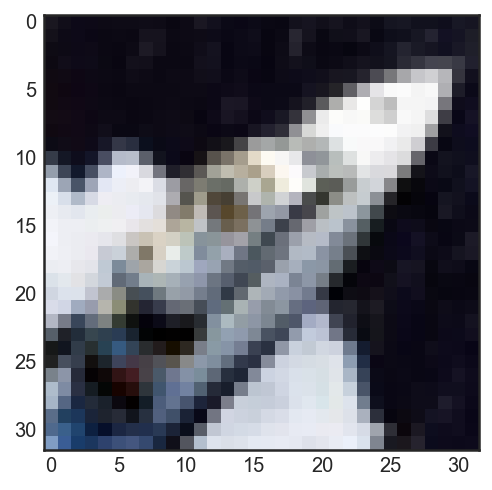

In [ ]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

# Explore the dataset
features, labels = display_stats(data_path, batch_id, sample_id)

###### Split out Data

In [ ]:
x_train = features[:int((features.shape[0]/100)*70)]
y_train = labels[:int((features.shape[0]/100)*70)]
y_train = np.asarray(y_train)

x_test = features[:features.shape[0] - x_train.shape[0]]
y_test = labels[:features.shape[0] - x_train.shape[0]]
y_test = np.asarray(y_test)

y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

x_val = x_test[:2000]
x_test = x_test[2000:]

y_val = y_test[:2000]
y_test = y_test[2000:]

print(x_train.shape,y_train.shape, x_val.shape, y_val.shape, x_test.shape,y_test.shape )

(7000, 32, 32, 3) (7000, 10) (2000, 32, 32, 3) (2000, 10) (1000, 32, 32, 3) (1000, 10)


##### Normalize Data

In [ ]:
# normalize data
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

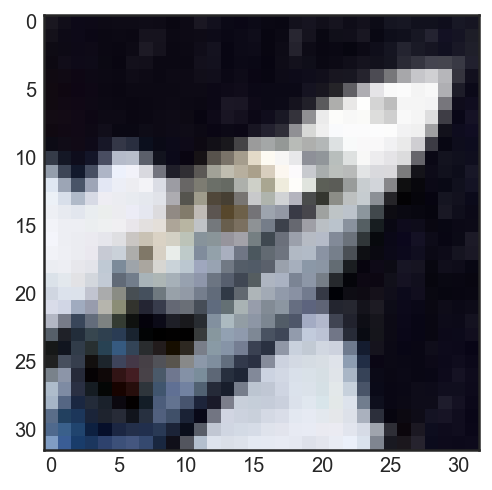

In [ ]:
plt.imshow(x_train[0])

### Start with some best practices!

In [ ]:
#Parameters
import sys;import argparse; sys.argv=['']; del sys
parser = argparse.ArgumentParser(description="AE")
parser.add_argument('--epochs', default=100, type=int)
parser.add_argument('--batch_size', default=32, type=int)
parser.add_argument('--lr', default=0.001, type=float)
parser.add_argument('--classes', default=10, type=int)
parser.add_argument('--n_units', default=128, type=int)

parser.add_argument('--height', default=32, type=int)
parser.add_argument('--width', default=32, type=int)
parser.add_argument('--channel', default=3, type=int)

parser.add_argument('--opt', default='adam', type=str)
parser.add_argument('--loss', default='categorical_crossentropy', type=str)


parser.add_argument('--train', default=False)
args_ae = parser.parse_args()
print(args_ae)



Namespace(batch_size=32, channel=3, classes=10, epochs=100, height=32, loss='categorical_crossentropy', lr=0.001, n_units=128, opt='adam', train=False, width=32)


## Extra Notes : Keras Intro

------------------------------------------------------------------------------------------

In [ ]:
model = models.Sequential()
model.add(Dense(512, activation='relu', input_shape=(NUM_ROWS * NUM_COLS,)))
model.add(Dropout(0.5))
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(10, activation='softmax'))
model.summary()

# Compile model
model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Train model
model.fit(X_train, y_train,
          batch_size=BATCH_SIZE,
          epochs=EPOCHS,
          callbacks=[plot_losses],
          verbose=1,
          validation_data=(X_test, y_test))

score = model.evaluate(X_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])


------------------------------------------------------------------------------------------

### Model Architecture [AE]

In [ ]:
def AE(height,width,channel, summ = True): 
    input_img = Input(shape=(height, width, channel))
    x = Conv2D(64, (3, 3), padding='same')(input_img)
    x = BatchNormalization()(x) # We normalize the input layer by adjusting and scaling the activations. so middle layers as well
    x = Activation('relu')(x)
    x = MaxPooling2D((2, 2), padding='same')(x)
    x = Conv2D(32, (3, 3), padding='same')(x)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)
    x = MaxPooling2D((2, 2), padding='same')(x)
    x = Conv2D(16, (3, 3), padding='same')(x)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)
    encoded = MaxPooling2D((2, 2), padding='same')(x)

    x = Conv2D(16, (3, 3), padding='same')(encoded)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)
    x = UpSampling2D((2, 2))(x)
    x = Conv2D(32, (3, 3), padding='same')(x)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)
    x = UpSampling2D((2, 2))(x)
    x = Conv2D(64, (3, 3), padding='same')(x)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)
    x = UpSampling2D((2, 2))(x)
    x = Conv2D(3, (3, 3), padding='same')(x)
    x = BatchNormalization()(x)
    decoded = Activation('sigmoid')(x)

    model = Model(input_img, decoded)
    model.compile(optimizer='adam', loss='binary_crossentropy')
    if summ == True:
        model.summary()
    return model

In [ ]:
Autoencoder = AE(height=args_ae.height, width=args_ae.width, 
                 channel=args_ae.channel, summ=False)

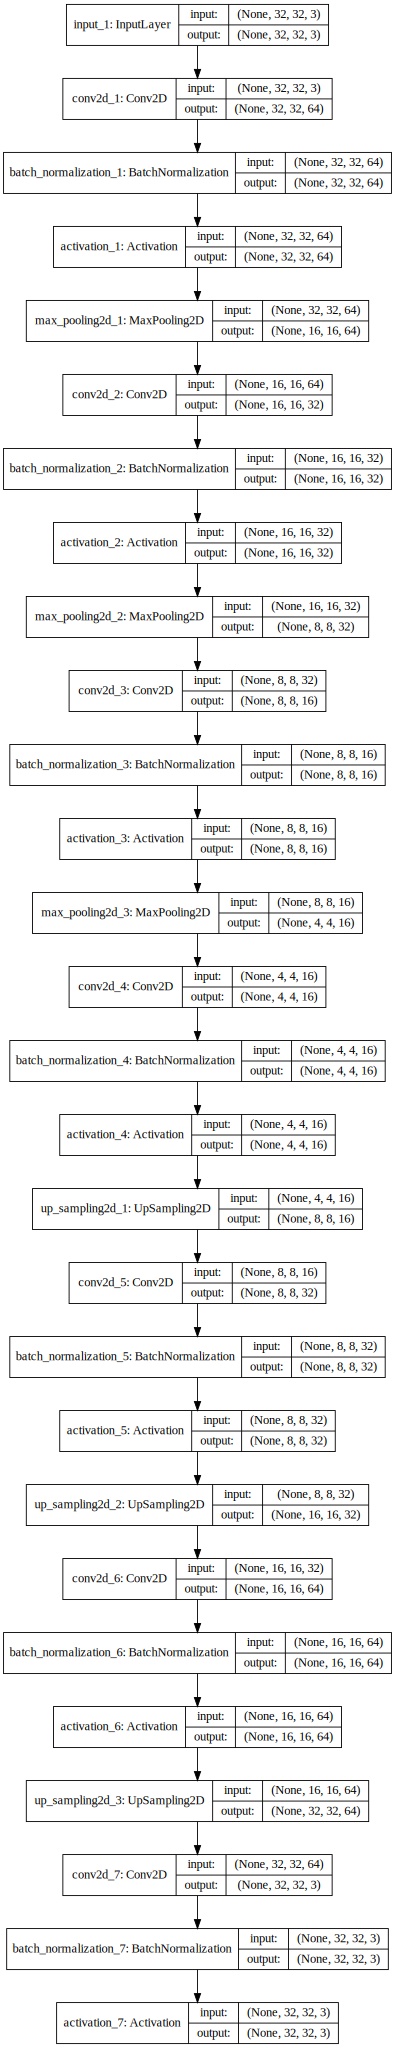

In [ ]:
SVG(model_to_dot(Autoencoder, show_shapes=True, 
             show_layer_names=True, 
             rankdir='TB').create(prog='dot', 
                                  format='svg'))

### Train [AE]

In [ ]:
# load pretrained weights
if args_ae.train==True:
    history_ae = Autoencoder.load_weights('./pretrained_model/AE.hdf5')
else:
    try:
        Autoencoder.load_weights('./pretrained_model/AE.hdf5') #reload weights and continue training
    except OSError:
        pass
    es_cb = EarlyStopping(monitor='val_loss', patience=2, verbose=1, mode='auto')
    chkpt = './pretrained_model/AE.{epoch:02d}-{loss:.2f}-{val_loss:.2f}.hdf5'
    cp_cb = ModelCheckpoint(filepath = chkpt, monitor='val_loss', verbose=1, save_best_only=True, mode='auto')
    #Train
    history_ae = Autoencoder.fit(x_train, x_train,
                    batch_size=128,
                    epochs=1,
                    verbose=1,
                    validation_data=(x_val, x_val),
                    callbacks=[es_cb, cp_cb],
                    shuffle=True)

Train on 7000 samples, validate on 2000 samples
Epoch 1/1
7000/7000 [==============================] - 252s - loss: -67.0884 - val_loss: -439.7546


### Save Model!

In [ ]:
Autoencoder.save_weights('./pretrained_model/AE10_2.h5')

In [ ]:
# Load Model
Autoencoder.load_weights('./pretrained_model/AE10_2.h5')

### Evaluate Training & Prediction

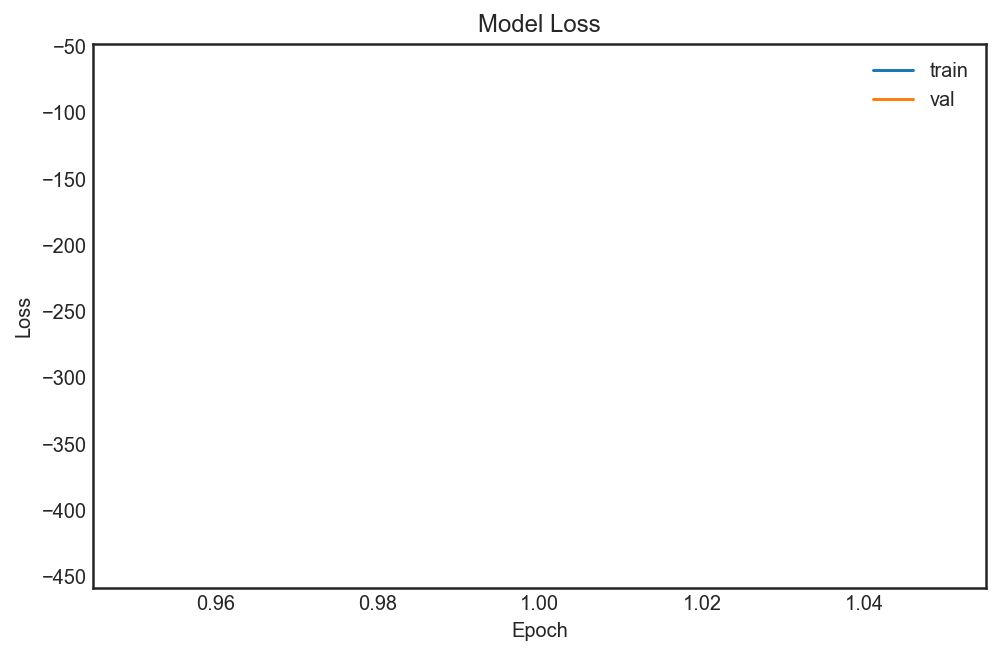

In [ ]:
plot_model_history_ae(history_ae)

In [ ]:
score = Autoencoder.evaluate(x_test, x_test, verbose=1)

1000/1000 [==============================] - ETA: 14 - ETA: 12 - ETA: 11 - ETA: 11 - ETA: 10 - ETA: 10 - ETA: 10 - ETA: 9 - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - 13s    


In [ ]:
print(score)

0.5671915574073791


In [ ]:
c10test = Autoencoder.predict(x_test)
c10val = Autoencoder.predict(x_val)

In [ ]:
print("Cifar10_test: {0}\nCifar10_val: {1}".format(np.average(c10test), np.average(c10val)))

Cifar10_test: 0.4745425581932068
Cifar10_val: 0.9998482465744019


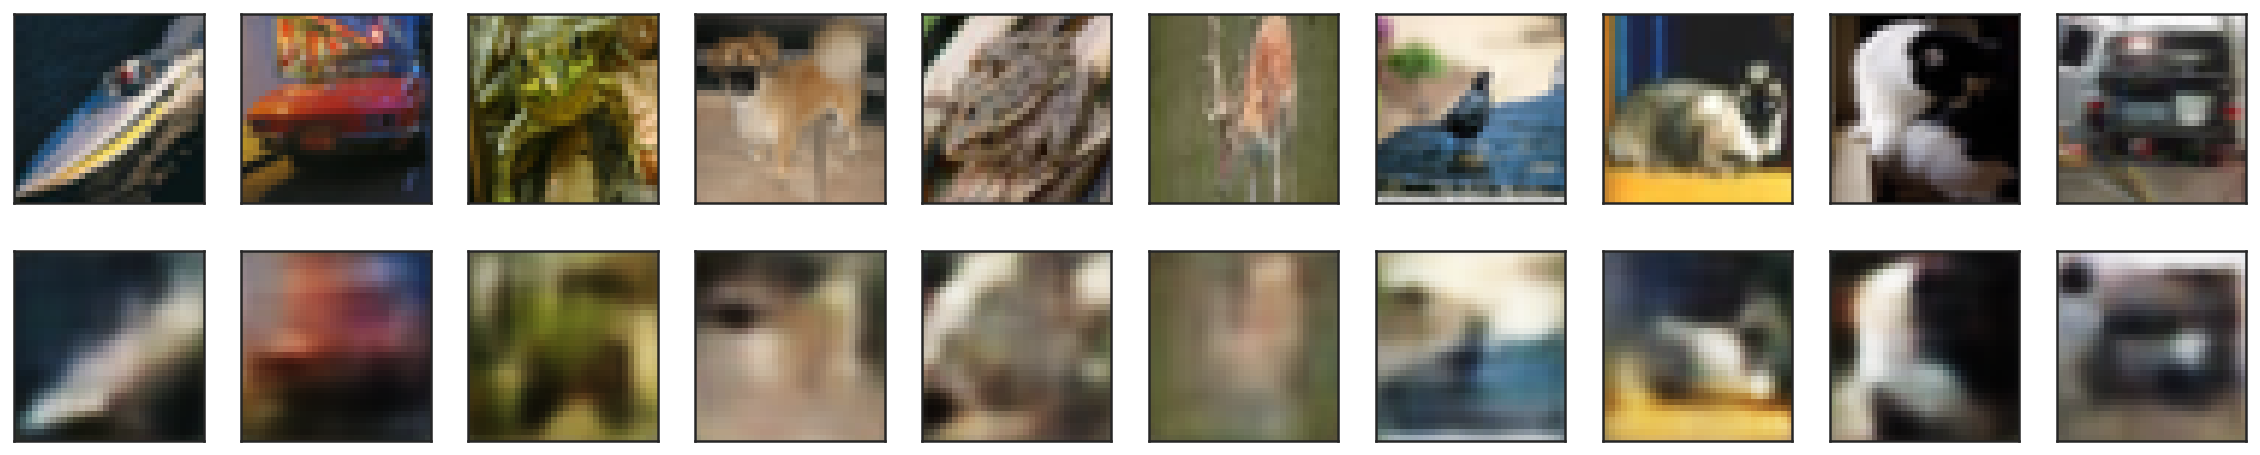

In [ ]:
showOrigDec(x_test, c10test)

    Questions:
    
        - What is the difference between RGB / BN in terms of parameters?
        - How much the accuracy improve / decrease?
        - Which are other possible tools to increace the accuracy of our model?

##  [Computer Vision - Image Denoising]

In [ ]:
noise_factor = 0.3
x_train_noisy = x_train + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_train.shape) 
x_test_noisy = x_test + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_test.shape) 
x_val_noisy = x_val + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_val.shape) 

x_train_noisy = np.clip(x_train_noisy, 0., 1.)
x_test_noisy = np.clip(x_test_noisy, 0., 1.)
x_val_noisy = np.clip(x_val_noisy, 0., 1.)

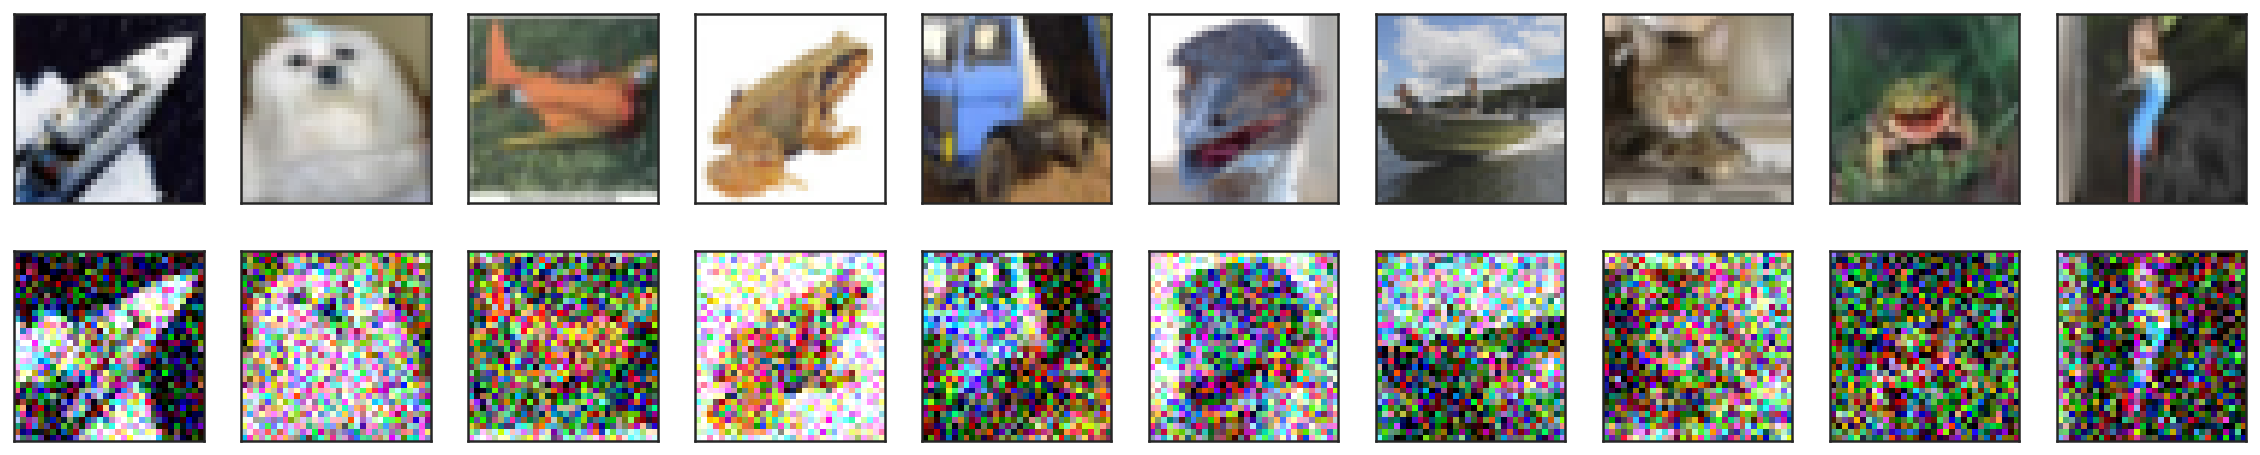

In [ ]:
showOrigDec(x_train, x_train_noisy)

#### Evaluate on original versus noisy data

In [ ]:
score = Autoencoder.evaluate(x_test_noisy, x_test, verbose=1)

1000/1000 [==============================] - ETA: 12 - ETA: 12 - ETA: 12 - ETA: 12 - ETA: 11 - ETA: 11 - ETA: 10 - ETA: 10 - ETA: 9 - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - 13s    


In [ ]:
print(score)

0.5791532773971557


In [ ]:
c10test = Autoencoder.predict(x_test_noisy)
c10val = Autoencoder.predict(x_val_noisy)

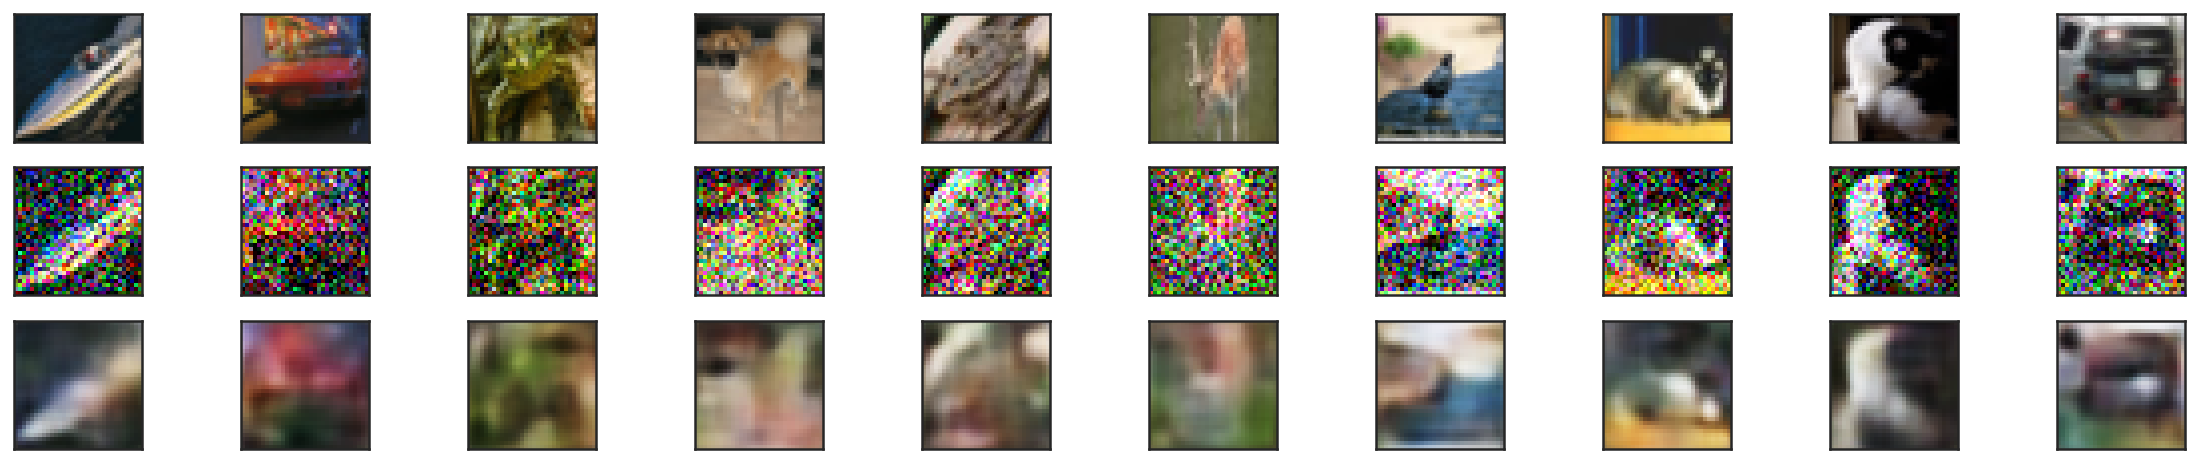

In [ ]:
showOrigDec2(x_test, x_test_noisy, c10test)

## [Sequence 2 Sequence Prediction] 

**In the previous example we input an image which was a basicaly a 2 dimentional data**, in this example we will input a **sequence data** as the input which will be **1 dimentional**. Example of sequence data are **time series** data and **text data**. This usecase can be applied in machine translation. Unlike CNNs in image example, in this use-case we will use **LSTMs**

### Autoencoder Architecture
The architecuture of this use case will contain an encoder to encode the source sequence and second to decode the encoded source sequence into the target sequence, called the decoder. First lets understand the internal working of LSTMs which will be used in this architecture.

![](images/lstm7.png)

- The Long Short-Term Memory, or LSTM, is a recurrent neural network that is comprised of internal gates.
- Unlike other recurrent neural networks, the network’s internal gates allow the model to be trained successfully using backpropagation through time, or BPTT, and avoid the vanishing gradients problem.
- We can define the number of LSTM memory units in the LSTM layer, Each unit or cell within the layer has an internal memory / cell state, often abbreviated as “c“, and outputs a hidden state, often abbreviated as “h“.
- By using Keras, we can access both output states of the LSTM layer as well as the current states of the LSTM layers.

Lets now create an autoencoder architecutre for learning and producing sequences made up of LSTM layers. There are two components:

- **An encoder architecture which takes a sequence as input and returns the current state of LSTM as the output**
- **A decoder architecture which takes the sequence and encoder LSTM states as input and returns the decoded output sequence**
- **We are saving and accessing hidden and memory states of LSTM so that we can use them while generating predictions on unseen data.**

We are saving and accessing hidden and memory states of LSTM so that we can use them while generating predictions on unseen data.

Lets first of all, generate a sequence dataset containing random sequences of fixed lengths. We will create a function to generate random sequences.

- X1 repersents the input sequence containing random numbers
- X2 repersents the padded sequence which is used as the seed to reproduce the other elements of the sequence
- y repersents the target sequence or the actual sequence

In [ ]:
# configure problem
n_features = 50 + 1
n_steps_in = 6
n_steps_out = 3

In [ ]:
# generate a sequence of random integers
def generate_sequence(length, n_unique):
    return [randint(1, n_unique-1) for _ in range(length)]

In [ ]:
# prepare data for the LSTM
def get_dataset(n_in, n_out, cardinality, n_samples):
    X1, X2, y = list(), list(), list()
    for _ in range(n_samples):
        # generate source sequence
        source = generate_sequence(n_in, cardinality)
        # define padded target sequence
        target = source[:n_out]
        target.reverse()
        # create padded input target sequence
        target_in = [0] + target[:-1]
        # encode
        src_encoded = to_categorical([source], num_classes=cardinality)
        tar_encoded = to_categorical([target], num_classes=cardinality)
        tar2_encoded = to_categorical([target_in], num_classes=cardinality)
        # store
        X1.append(src_encoded)
        X2.append(tar2_encoded)
        y.append(tar_encoded)
    return array(X1), array(X2), array(y)

# generate training dataset
X1, X2, y = get_dataset(n_steps_in, n_steps_out, n_features, 100000)
print(X1.shape,X2.shape,y.shape)

(100000, 6, 51) (100000, 3, 51) (100000, 3, 51)


In [ ]:
# returns train, inference_encoder and inference_decoder models
def AE_LSTM(n_input, n_output, n_units):
    # define training encoder
    encoder_inputs = Input(shape=(None, n_input))
    encoder = LSTM(n_units, return_state=True)
    encoder_outputs, state_h, state_c = encoder(encoder_inputs)
    encoder_states = [state_h, state_c]
    # define training decoder
    decoder_inputs = Input(shape=(None, n_output))
    decoder_lstm = LSTM(n_units, return_sequences=True, return_state=True)
    decoder_outputs, _, _ = decoder_lstm(decoder_inputs, initial_state=encoder_states)
    decoder_dense = Dense(n_output, activation='softmax')
    decoder_outputs = decoder_dense(decoder_outputs)
    model = Model([encoder_inputs, decoder_inputs], decoder_outputs)
    # define inference encoder
    encoder_model = Model(encoder_inputs, encoder_states)
    # define inference decoder
    decoder_state_input_h = Input(shape=(n_units,))
    decoder_state_input_c = Input(shape=(n_units,))
    decoder_states_inputs = [decoder_state_input_h, decoder_state_input_c]
    decoder_outputs, state_h, state_c = decoder_lstm(decoder_inputs, initial_state=decoder_states_inputs)
    decoder_states = [state_h, state_c]
    decoder_outputs = decoder_dense(decoder_outputs)
    decoder_model = Model([decoder_inputs] + decoder_states_inputs, [decoder_outputs] + decoder_states)
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['acc'])
    print('\n Encoder :')
    encoder_model.summary()
    print('\n Decoder :')
    decoder_model.summary()
    # return all models
    return model, encoder_model, decoder_model

In [ ]:
# define model
train, infenc, infdec = AE_LSTM(n_features, n_features, args_ae.n_units) # 128


 Encoder :
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_9 (InputLayer)         (None, None, 51)          0         
_________________________________________________________________
lstm_5 (LSTM)                [(None, 128), (None, 128) 92160     
Total params: 92,160
Trainable params: 92,160
Non-trainable params: 0
_________________________________________________________________

 Decoder :
____________________________________________________________________________________________________
Layer (type)                     Output Shape          Param #     Connected to                     
input_10 (InputLayer)            (None, None, 51)      0                                            
____________________________________________________________________________________________________
input_11 (InputLayer)            (None, 128)           0                                            
_____

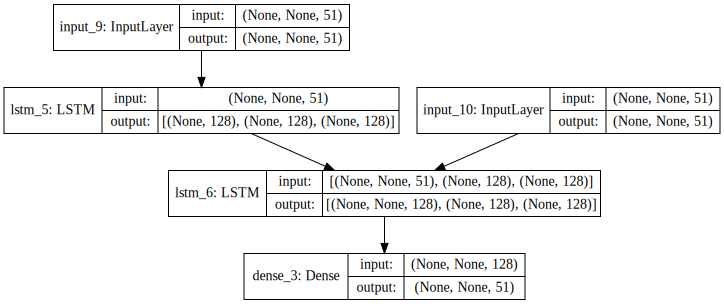

In [ ]:
SVG(model_to_dot(train, show_shapes=True, 
             show_layer_names=True, 
             rankdir='TB').create(prog='dot', 
                                  format='svg'))

In [ ]:
# generate target given source sequence
def predict_sequence(infenc, infdec, source, n_steps, cardinality):
    # encode
    state = infenc.predict(source)
    # start of sequence input
    target_seq = array([0.0 for _ in range(cardinality)]).reshape(1, 1, cardinality)
    # collect predictions
    output = list()
    for t in range(n_steps):
        # predict next char
        yhat, h, c = infdec.predict([target_seq] + state)
        # store prediction
        output.append(yhat[0,0,:])
        # update state
        state = [h, c]
        # update target sequence
        target_seq = yhat
    return array(output)

# decode a one hot encoded string
def one_hot_decode(encoded_seq):
    return [argmax(vector) for vector in encoded_seq]

In [ ]:
# train model
train.fit([X1, X2], y, epochs=1)

Epoch 1/1


  8064/100000 [=>............................] - ETA: 10810s - loss: 3.9358 - acc: 0.010 - ETA: 5495s - loss: 3.9330 - acc: 0.015 - ETA: 3738s - loss: 3.9328 - acc: 0.01 - ETA: 2845s - loss: 3.9320 - acc: 0.01 - ETA: 2313s - loss: 3.9321 - acc: 0.01 - ETA: 1958s - loss: 3.9308 - acc: 0.01 - ETA: 1707s - loss: 3.9311 - acc: 0.01 - ETA: 1518s - loss: 3.9305 - acc: 0.02 - ETA: 1374s - loss: 3.9298 - acc: 0.02 - ETA: 1256s - loss: 3.9300 - acc: 0.01 - ETA: 1157s - loss: 3.9295 - acc: 0.02 - ETA: 1074s - loss: 3.9293 - acc: 0.02 - ETA: 1006s - loss: 3.9286 - acc: 0.02 - ETA: 945s - loss: 3.9283 - acc: 0.0223 - ETA: 894s - loss: 3.9278 - acc: 0.022 - ETA: 848s - loss: 3.9275 - acc: 0.023 - ETA: 809s - loss: 3.9269 - acc: 0.025 - ETA: 774s - loss: 3.9264 - acc: 0.028 - ETA: 744s - loss: 3.9259 - acc: 0.028 - ETA: 716s - loss: 3.9257 - acc: 0.029 - ETA: 690s - loss: 3.9254 - acc: 0.030 - ETA: 665s - loss: 3.9250 - acc: 0.030 - ETA: 644s - loss: 3.9246 - acc: 0.030 - ETA: 624s - loss: 3.9244 - 

 23424/100000 [======>.......................] - ETA: 157s - loss: 2.1748 - acc: 0.319 - ETA: 157s - loss: 2.1723 - acc: 0.319 - ETA: 157s - loss: 2.1708 - acc: 0.319 - ETA: 156s - loss: 2.1678 - acc: 0.320 - ETA: 156s - loss: 2.1664 - acc: 0.320 - ETA: 156s - loss: 2.1649 - acc: 0.320 - ETA: 156s - loss: 2.1635 - acc: 0.321 - ETA: 156s - loss: 2.1621 - acc: 0.321 - ETA: 156s - loss: 2.1607 - acc: 0.321 - ETA: 156s - loss: 2.1593 - acc: 0.321 - ETA: 156s - loss: 2.1579 - acc: 0.322 - ETA: 156s - loss: 2.1563 - acc: 0.322 - ETA: 156s - loss: 2.1548 - acc: 0.322 - ETA: 156s - loss: 2.1533 - acc: 0.322 - ETA: 156s - loss: 2.1518 - acc: 0.323 - ETA: 156s - loss: 2.1501 - acc: 0.323 - ETA: 155s - loss: 2.1486 - acc: 0.323 - ETA: 155s - loss: 2.1470 - acc: 0.324 - ETA: 155s - loss: 2.1458 - acc: 0.324 - ETA: 155s - loss: 2.1444 - acc: 0.324 - ETA: 155s - loss: 2.1430 - acc: 0.324 - ETA: 155s - loss: 2.1416 - acc: 0.325 - ETA: 155s - loss: 2.1401 - acc: 0.325 - ETA: 155s - loss: 2.1385 - acc:

 30080/100000 [========>.....................] - ETA: 137s - loss: 1.8796 - acc: 0.380 - ETA: 137s - loss: 1.8773 - acc: 0.380 - ETA: 137s - loss: 1.8763 - acc: 0.381 - ETA: 137s - loss: 1.8752 - acc: 0.381 - ETA: 137s - loss: 1.8741 - acc: 0.381 - ETA: 137s - loss: 1.8731 - acc: 0.382 - ETA: 137s - loss: 1.8718 - acc: 0.382 - ETA: 137s - loss: 1.8708 - acc: 0.382 - ETA: 137s - loss: 1.8699 - acc: 0.382 - ETA: 137s - loss: 1.8688 - acc: 0.382 - ETA: 137s - loss: 1.8679 - acc: 0.383 - ETA: 136s - loss: 1.8658 - acc: 0.383 - ETA: 136s - loss: 1.8647 - acc: 0.384 - ETA: 136s - loss: 1.8637 - acc: 0.384 - ETA: 136s - loss: 1.8627 - acc: 0.384 - ETA: 136s - loss: 1.8616 - acc: 0.384 - ETA: 136s - loss: 1.8595 - acc: 0.385 - ETA: 136s - loss: 1.8584 - acc: 0.385 - ETA: 136s - loss: 1.8573 - acc: 0.385 - ETA: 136s - loss: 1.8564 - acc: 0.386 - ETA: 136s - loss: 1.8554 - acc: 0.386 - ETA: 136s - loss: 1.8543 - acc: 0.386 - ETA: 136s - loss: 1.8533 - acc: 0.386 - ETA: 136s - loss: 1.8524 - acc:

 37120/100000 [==========>...................] - ETA: 132s - loss: 1.6779 - acc: 0.437 - ETA: 132s - loss: 1.6770 - acc: 0.437 - ETA: 132s - loss: 1.6760 - acc: 0.438 - ETA: 132s - loss: 1.6751 - acc: 0.438 - ETA: 132s - loss: 1.6742 - acc: 0.438 - ETA: 132s - loss: 1.6732 - acc: 0.438 - ETA: 132s - loss: 1.6724 - acc: 0.439 - ETA: 132s - loss: 1.6715 - acc: 0.439 - ETA: 132s - loss: 1.6705 - acc: 0.439 - ETA: 132s - loss: 1.6695 - acc: 0.440 - ETA: 132s - loss: 1.6687 - acc: 0.440 - ETA: 132s - loss: 1.6678 - acc: 0.440 - ETA: 132s - loss: 1.6668 - acc: 0.441 - ETA: 131s - loss: 1.6659 - acc: 0.441 - ETA: 131s - loss: 1.6649 - acc: 0.441 - ETA: 131s - loss: 1.6642 - acc: 0.441 - ETA: 131s - loss: 1.6633 - acc: 0.442 - ETA: 131s - loss: 1.6624 - acc: 0.442 - ETA: 131s - loss: 1.6614 - acc: 0.442 - ETA: 131s - loss: 1.6605 - acc: 0.442 - ETA: 131s - loss: 1.6596 - acc: 0.443 - ETA: 131s - loss: 1.6586 - acc: 0.443 - ETA: 131s - loss: 1.6577 - acc: 0.443 - ETA: 131s - loss: 1.6568 - acc:

 44768/100000 [============>.................] - ETA: 118s - loss: 1.4838 - acc: 0.502 - ETA: 118s - loss: 1.4829 - acc: 0.503 - ETA: 118s - loss: 1.4821 - acc: 0.503 - ETA: 118s - loss: 1.4813 - acc: 0.503 - ETA: 118s - loss: 1.4805 - acc: 0.503 - ETA: 118s - loss: 1.4796 - acc: 0.504 - ETA: 118s - loss: 1.4788 - acc: 0.504 - ETA: 118s - loss: 1.4780 - acc: 0.504 - ETA: 117s - loss: 1.4771 - acc: 0.505 - ETA: 117s - loss: 1.4762 - acc: 0.505 - ETA: 117s - loss: 1.4754 - acc: 0.505 - ETA: 117s - loss: 1.4745 - acc: 0.505 - ETA: 117s - loss: 1.4737 - acc: 0.506 - ETA: 117s - loss: 1.4728 - acc: 0.506 - ETA: 117s - loss: 1.4719 - acc: 0.506 - ETA: 117s - loss: 1.4711 - acc: 0.507 - ETA: 117s - loss: 1.4702 - acc: 0.507 - ETA: 117s - loss: 1.4694 - acc: 0.507 - ETA: 117s - loss: 1.4685 - acc: 0.508 - ETA: 117s - loss: 1.4676 - acc: 0.508 - ETA: 117s - loss: 1.4668 - acc: 0.508 - ETA: 117s - loss: 1.4660 - acc: 0.508 - ETA: 117s - loss: 1.4652 - acc: 0.509 - ETA: 117s - loss: 1.4645 - acc:

 52864/100000 [==============>...............] - ETA: 101s - loss: 1.2970 - acc: 0.569 - ETA: 101s - loss: 1.2955 - acc: 0.570 - ETA: 101s - loss: 1.2941 - acc: 0.570 - ETA: 101s - loss: 1.2934 - acc: 0.570 - ETA: 101s - loss: 1.2927 - acc: 0.571 - ETA: 101s - loss: 1.2920 - acc: 0.571 - ETA: 101s - loss: 1.2913 - acc: 0.571 - ETA: 101s - loss: 1.2906 - acc: 0.571 - ETA: 101s - loss: 1.2899 - acc: 0.572 - ETA: 101s - loss: 1.2892 - acc: 0.572 - ETA: 101s - loss: 1.2885 - acc: 0.572 - ETA: 101s - loss: 1.2878 - acc: 0.572 - ETA: 101s - loss: 1.2871 - acc: 0.573 - ETA: 101s - loss: 1.2863 - acc: 0.573 - ETA: 100s - loss: 1.2856 - acc: 0.573 - ETA: 100s - loss: 1.2849 - acc: 0.573 - ETA: 100s - loss: 1.2842 - acc: 0.574 - ETA: 100s - loss: 1.2835 - acc: 0.574 - ETA: 100s - loss: 1.2828 - acc: 0.574 - ETA: 100s - loss: 1.2820 - acc: 0.574 - ETA: 100s - loss: 1.2814 - acc: 0.575 - ETA: 100s - loss: 1.2800 - acc: 0.575 - ETA: 100s - loss: 1.2793 - acc: 0.575 - ETA: 100s - loss: 1.2785 - acc:

 60800/100000 [=================>............] - ETA: 85s - loss: 1.1327 - acc: 0.62 - ETA: 85s - loss: 1.1321 - acc: 0.62 - ETA: 85s - loss: 1.1315 - acc: 0.62 - ETA: 85s - loss: 1.1303 - acc: 0.62 - ETA: 85s - loss: 1.1298 - acc: 0.62 - ETA: 85s - loss: 1.1286 - acc: 0.62 - ETA: 85s - loss: 1.1280 - acc: 0.62 - ETA: 85s - loss: 1.1274 - acc: 0.62 - ETA: 85s - loss: 1.1268 - acc: 0.62 - ETA: 85s - loss: 1.1263 - acc: 0.63 - ETA: 84s - loss: 1.1257 - acc: 0.63 - ETA: 84s - loss: 1.1251 - acc: 0.63 - ETA: 84s - loss: 1.1245 - acc: 0.63 - ETA: 84s - loss: 1.1240 - acc: 0.63 - ETA: 84s - loss: 1.1228 - acc: 0.63 - ETA: 84s - loss: 1.1216 - acc: 0.63 - ETA: 84s - loss: 1.1211 - acc: 0.63 - ETA: 84s - loss: 1.1205 - acc: 0.63 - ETA: 84s - loss: 1.1199 - acc: 0.63 - ETA: 84s - loss: 1.1194 - acc: 0.63 - ETA: 84s - loss: 1.1188 - acc: 0.63 - ETA: 84s - loss: 1.1182 - acc: 0.63 - ETA: 84s - loss: 1.1177 - acc: 0.63 - ETA: 84s - loss: 1.1171 - acc: 0.63 - ETA: 83s - loss: 1.1159 - acc: 0.63 - E

 68096/100000 [===================>..........] - ETA: 70s - loss: 1.0026 - acc: 0.67 - ETA: 70s - loss: 1.0021 - acc: 0.67 - ETA: 70s - loss: 1.0016 - acc: 0.67 - ETA: 70s - loss: 1.0012 - acc: 0.67 - ETA: 70s - loss: 1.0007 - acc: 0.67 - ETA: 70s - loss: 1.0002 - acc: 0.67 - ETA: 70s - loss: 0.9998 - acc: 0.67 - ETA: 70s - loss: 0.9993 - acc: 0.67 - ETA: 70s - loss: 0.9988 - acc: 0.67 - ETA: 70s - loss: 0.9983 - acc: 0.67 - ETA: 70s - loss: 0.9979 - acc: 0.67 - ETA: 70s - loss: 0.9974 - acc: 0.67 - ETA: 70s - loss: 0.9969 - acc: 0.67 - ETA: 69s - loss: 0.9965 - acc: 0.67 - ETA: 69s - loss: 0.9960 - acc: 0.67 - ETA: 69s - loss: 0.9955 - acc: 0.67 - ETA: 69s - loss: 0.9951 - acc: 0.67 - ETA: 69s - loss: 0.9946 - acc: 0.67 - ETA: 69s - loss: 0.9941 - acc: 0.67 - ETA: 69s - loss: 0.9936 - acc: 0.67 - ETA: 69s - loss: 0.9932 - acc: 0.67 - ETA: 69s - loss: 0.9923 - acc: 0.67 - ETA: 69s - loss: 0.9918 - acc: 0.67 - ETA: 69s - loss: 0.9914 - acc: 0.67 - ETA: 69s - loss: 0.9909 - acc: 0.67 - E

 75456/100000 [=====================>........] - ETA: 57s - loss: 0.9046 - acc: 0.70 - ETA: 57s - loss: 0.9043 - acc: 0.70 - ETA: 57s - loss: 0.9039 - acc: 0.70 - ETA: 57s - loss: 0.9035 - acc: 0.70 - ETA: 57s - loss: 0.9031 - acc: 0.70 - ETA: 57s - loss: 0.9027 - acc: 0.70 - ETA: 57s - loss: 0.9023 - acc: 0.70 - ETA: 57s - loss: 0.9019 - acc: 0.70 - ETA: 57s - loss: 0.9015 - acc: 0.70 - ETA: 57s - loss: 0.9011 - acc: 0.70 - ETA: 57s - loss: 0.9007 - acc: 0.70 - ETA: 57s - loss: 0.9004 - acc: 0.70 - ETA: 56s - loss: 0.9000 - acc: 0.70 - ETA: 56s - loss: 0.8996 - acc: 0.70 - ETA: 56s - loss: 0.8992 - acc: 0.70 - ETA: 56s - loss: 0.8988 - acc: 0.70 - ETA: 56s - loss: 0.8984 - acc: 0.70 - ETA: 56s - loss: 0.8980 - acc: 0.70 - ETA: 56s - loss: 0.8976 - acc: 0.70 - ETA: 56s - loss: 0.8973 - acc: 0.70 - ETA: 56s - loss: 0.8969 - acc: 0.70 - ETA: 56s - loss: 0.8965 - acc: 0.70 - ETA: 56s - loss: 0.8961 - acc: 0.70 - ETA: 56s - loss: 0.8957 - acc: 0.71 - ETA: 56s - loss: 0.8953 - acc: 0.71 - E

 82944/100000 [=======================>......] - ETA: 44s - loss: 0.8226 - acc: 0.73 - ETA: 44s - loss: 0.8222 - acc: 0.73 - ETA: 44s - loss: 0.8216 - acc: 0.73 - ETA: 44s - loss: 0.8209 - acc: 0.73 - ETA: 44s - loss: 0.8206 - acc: 0.73 - ETA: 43s - loss: 0.8203 - acc: 0.73 - ETA: 43s - loss: 0.8200 - acc: 0.73 - ETA: 43s - loss: 0.8196 - acc: 0.73 - ETA: 43s - loss: 0.8193 - acc: 0.73 - ETA: 43s - loss: 0.8190 - acc: 0.73 - ETA: 43s - loss: 0.8187 - acc: 0.73 - ETA: 43s - loss: 0.8184 - acc: 0.73 - ETA: 43s - loss: 0.8180 - acc: 0.73 - ETA: 43s - loss: 0.8177 - acc: 0.73 - ETA: 43s - loss: 0.8174 - acc: 0.73 - ETA: 43s - loss: 0.8171 - acc: 0.73 - ETA: 43s - loss: 0.8168 - acc: 0.73 - ETA: 43s - loss: 0.8164 - acc: 0.73 - ETA: 43s - loss: 0.8161 - acc: 0.73 - ETA: 43s - loss: 0.8158 - acc: 0.73 - ETA: 43s - loss: 0.8155 - acc: 0.73 - ETA: 43s - loss: 0.8151 - acc: 0.73 - ETA: 43s - loss: 0.8148 - acc: 0.73 - ETA: 43s - loss: 0.8145 - acc: 0.73 - ETA: 42s - loss: 0.8142 - acc: 0.73 - E

 89888/100000 [=========================>....] - ETA: 30s - loss: 0.7525 - acc: 0.75 - ETA: 30s - loss: 0.7522 - acc: 0.75 - ETA: 30s - loss: 0.7520 - acc: 0.75 - ETA: 30s - loss: 0.7517 - acc: 0.75 - ETA: 30s - loss: 0.7514 - acc: 0.75 - ETA: 30s - loss: 0.7512 - acc: 0.75 - ETA: 30s - loss: 0.7509 - acc: 0.75 - ETA: 30s - loss: 0.7506 - acc: 0.75 - ETA: 30s - loss: 0.7503 - acc: 0.75 - ETA: 30s - loss: 0.7501 - acc: 0.75 - ETA: 30s - loss: 0.7498 - acc: 0.75 - ETA: 30s - loss: 0.7495 - acc: 0.75 - ETA: 30s - loss: 0.7493 - acc: 0.75 - ETA: 30s - loss: 0.7490 - acc: 0.75 - ETA: 30s - loss: 0.7487 - acc: 0.75 - ETA: 30s - loss: 0.7485 - acc: 0.75 - ETA: 29s - loss: 0.7482 - acc: 0.75 - ETA: 29s - loss: 0.7479 - acc: 0.75 - ETA: 29s - loss: 0.7476 - acc: 0.76 - ETA: 29s - loss: 0.7474 - acc: 0.76 - ETA: 29s - loss: 0.7471 - acc: 0.76 - ETA: 29s - loss: 0.7468 - acc: 0.76 - ETA: 29s - loss: 0.7466 - acc: 0.76 - ETA: 29s - loss: 0.7463 - acc: 0.76 - ETA: 29s - loss: 0.7460 - acc: 0.76 - E

 97088/100000 [============================>.] - ETA: 18s - loss: 0.6972 - acc: 0.77 - ETA: 18s - loss: 0.6969 - acc: 0.77 - ETA: 18s - loss: 0.6967 - acc: 0.77 - ETA: 18s - loss: 0.6964 - acc: 0.77 - ETA: 18s - loss: 0.6962 - acc: 0.77 - ETA: 18s - loss: 0.6960 - acc: 0.77 - ETA: 18s - loss: 0.6957 - acc: 0.77 - ETA: 18s - loss: 0.6955 - acc: 0.77 - ETA: 18s - loss: 0.6953 - acc: 0.77 - ETA: 18s - loss: 0.6950 - acc: 0.77 - ETA: 18s - loss: 0.6948 - acc: 0.77 - ETA: 17s - loss: 0.6946 - acc: 0.77 - ETA: 17s - loss: 0.6943 - acc: 0.77 - ETA: 17s - loss: 0.6941 - acc: 0.77 - ETA: 17s - loss: 0.6939 - acc: 0.77 - ETA: 17s - loss: 0.6936 - acc: 0.77 - ETA: 17s - loss: 0.6934 - acc: 0.77 - ETA: 17s - loss: 0.6932 - acc: 0.77 - ETA: 17s - loss: 0.6929 - acc: 0.77 - ETA: 17s - loss: 0.6927 - acc: 0.77 - ETA: 17s - loss: 0.6925 - acc: 0.77 - ETA: 17s - loss: 0.6922 - acc: 0.77 - ETA: 17s - loss: 0.6920 - acc: 0.77 - ETA: 17s - loss: 0.6918 - acc: 0.77 - ETA: 17s - loss: 0.6915 - acc: 0.77 - E

100000/100000 [==============================] - ETA: 5s - loss: 0.6476 - acc: 0.793 - ETA: 5s - loss: 0.6474 - acc: 0.793 - ETA: 5s - loss: 0.6471 - acc: 0.793 - ETA: 5s - loss: 0.6469 - acc: 0.793 - ETA: 5s - loss: 0.6467 - acc: 0.793 - ETA: 5s - loss: 0.6465 - acc: 0.793 - ETA: 4s - loss: 0.6463 - acc: 0.793 - ETA: 4s - loss: 0.6461 - acc: 0.793 - ETA: 4s - loss: 0.6459 - acc: 0.793 - ETA: 4s - loss: 0.6457 - acc: 0.793 - ETA: 4s - loss: 0.6455 - acc: 0.793 - ETA: 4s - loss: 0.6453 - acc: 0.793 - ETA: 4s - loss: 0.6451 - acc: 0.793 - ETA: 4s - loss: 0.6449 - acc: 0.793 - ETA: 4s - loss: 0.6447 - acc: 0.794 - ETA: 4s - loss: 0.6445 - acc: 0.794 - ETA: 4s - loss: 0.6443 - acc: 0.794 - ETA: 4s - loss: 0.6439 - acc: 0.794 - ETA: 4s - loss: 0.6437 - acc: 0.794 - ETA: 4s - loss: 0.6435 - acc: 0.794 - ETA: 4s - loss: 0.6433 - acc: 0.794 - ETA: 4s - loss: 0.6431 - acc: 0.794 - ETA: 3s - loss: 0.6429 - acc: 0.794 - ETA: 3s - loss: 0.6427 - acc: 0.794 - ETA: 3s - loss: 0.6425 - acc: 0.794 - E

In [ ]:
# evaluate LSTM
total, correct = 100, 0
for _ in range(total):
    X1, X2, y = get_dataset(n_steps_in, n_steps_out, n_features, 1)
    target = predict_sequence(infenc, infdec, X1, n_steps_out, n_features)
    if array_equal(one_hot_decode(y[0]), one_hot_decode(target)):
        correct += 1
print('Accuracy: %.2f%%' % (float(correct)/float(total)*100.0))
# spot check some examples
for _ in range(10):
    X1, X2, y = get_dataset(n_steps_in, n_steps_out, n_features, 1)
    target = predict_sequence(infenc, infdec, X1, n_steps_out, n_features)
    print('X=%s y=%s, yhat=%s' % (one_hot_decode(X1[0]), one_hot_decode(y[0]), one_hot_decode(target)))

Accuracy: 99.00%
X=[13, 14, 33, 18, 1, 44] y=[33, 14, 13], yhat=[33, 14, 13]
X=[8, 48, 31, 50, 16, 47] y=[31, 48, 8], yhat=[31, 48, 8]
X=[10, 15, 27, 37, 25, 31] y=[27, 15, 10], yhat=[27, 15, 10]
X=[18, 49, 40, 46, 43, 9] y=[40, 49, 18], yhat=[40, 49, 18]
X=[31, 35, 28, 5, 26, 12] y=[28, 35, 31], yhat=[28, 35, 31]
X=[24, 44, 50, 23, 25, 6] y=[50, 44, 24], yhat=[50, 44, 24]
X=[8, 50, 48, 44, 34, 35] y=[48, 50, 8], yhat=[48, 50, 8]
X=[30, 15, 33, 21, 12, 50] y=[33, 15, 30], yhat=[33, 15, 30]
X=[35, 38, 10, 29, 26, 50] y=[10, 38, 35], yhat=[10, 38, 35]
X=[34, 33, 12, 37, 27, 3] y=[12, 33, 34], yhat=[12, 33, 34]


Now we need to achieve the State-of-the-Art

   ## Variational AutoEncoders

- Variational Autoencoders (VAEs) are powerful **generative models**

-----------------------------------------------------------------------------

- VAE is rooted in bayesian inference, i.e. it wants to model the underlying probability distribution of data so that it could sample new data from that distribution.

- GAN is rooted in game theory, its objective is to find the Nash Equilibrium between discriminator net and generator net

-----------------------------------------------------------------------------


Before all some recap:

------------------------------------------------------------------------------

"**generative models**" are useful for :
- generate a random, new output, that looks similar to the training data
- Alter and explore variations on data you already have in a desired, specific direction

----------------------------------------------------------------------------

#### [Standard AE]
![](images/AEex1.png)

- Loss Function : MSE/Cross-Entropy between output and the input, known as the **reconstruction loss** that penalizes the network for creating outputs different from the input.

--------------------------------------------------------------------------

#### Problem with [AE]
- In latent space the input converted into encoded vector may not be continuous, or allow easy interpolation

### V-AEs
- Latent spaces are, by design, **continuous**
- V-AEs haven't just **one** encoding vector (see figure above) but **two** :
    - a vector of means $\mu$
    - a vector of standard deviations $\sigma$
    
![](images/VAEex2.png)

This is call: **Stochastic Generator**

Where :

<img src="images/VAE3.png" width="250">

- means define the center, standard deviations the circular area
- Decoding part inside a V-AE learn not from a specific encoding in latent space but from a **distribution**

At this point we need K-L divergence into our loss function:

$$\sum^n_{i=1} \sigma_i^2 + \mu_i^2 - log(\sigma_i) -1$$

Due to achieve a result as soon as possible as :

<img src="images/vae4.png" width="300">
"minimized with $\mu_i = 0 , \sigma_i = 1 $ → clusterized near origin

### Extra Notes :

------------------------------------------------------------------------------------------------------------------------------

**Deep Unsupervised Clustering with Gaussian Mixture Variational Autoencoders.** Nat Dilokthanakul, Pedro A.M. Mediano, Marta Garnelo, Matthew C.H. Lee, Hugh Salimbeni, Kai Arulkumaran, Murray Shanahan.

----> Blog : http://ruishu.io/2016/12/25/gmvae/

------------------------------------------------------------------------------------------------------------------------------


In [ ]:
#  Base Example

# prerequisites
from keras.datasets import mnist
from keras.layers import Input, Dense, Lambda
from keras import backend as K
from keras import objectives
from scipy.stats import norm


# data load
(x_tr, y_tr), (x_te, y_te) = mnist.load_data()
x_tr, x_te = x_tr.astype('float32')/255., x_te.astype('float32')/255.
x_tr, x_te = x_tr.reshape(x_tr.shape[0], -1), x_te.reshape(x_te.shape[0], -1)
print(x_tr.shape, x_te.shape)

# network parameters
batch_size, n_epoch = 100, 100
n_hidden, z_dim = 256, 2

(60000, 784) (10000, 784)


In [ ]:
# encoder
x = Input(shape=(x_tr.shape[1:]))
x_encoded = Dense(n_hidden, activation='relu')(x)
x_encoded = Dense(n_hidden//2, activation='relu')(x_encoded)

mu = Dense(z_dim)(x_encoded)
log_var = Dense(z_dim)(x_encoded)

In [ ]:
# sampling function
def sampling(args):
    mu, log_var = args
    eps = K.random_normal(shape=(batch_size, z_dim), mean=0., stddev=1.0)
    return mu + K.exp(log_var) * eps

z = Lambda(sampling, output_shape=(z_dim,))([mu, log_var])

In [ ]:
# decoder
z_decoder1 = Dense(n_hidden//2, activation='relu')
z_decoder2 = Dense(n_hidden, activation='relu')
y_decoder = Dense(x_tr.shape[1], activation='sigmoid')

z_decoded = z_decoder1(z)
z_decoded = z_decoder2(z_decoded)
y = y_decoder(z_decoded)

In [ ]:
# loss
reconstruction_loss = objectives.binary_crossentropy(x, y) * x_tr.shape[1]
kl_loss = 0.5 * K.sum(K.square(mu) + K.exp(log_var) - log_var - 1, axis = -1)
vae_loss = reconstruction_loss + kl_loss

# build model
vae = Model(x, y)
vae.add_loss(vae_loss)
vae.compile(optimizer='rmsprop', loss='')
vae.summary()

____________________________________________________________________________________________________
Layer (type)                     Output Shape          Param #     Connected to                     
input_13 (InputLayer)            (None, 784)           0                                            
____________________________________________________________________________________________________
dense_4 (Dense)                  (None, 256)           200960      input_13[0][0]                   
____________________________________________________________________________________________________
dense_5 (Dense)                  (None, 128)           32896       dense_4[0][0]                    
____________________________________________________________________________________________________
dense_6 (Dense)                  (None, 2)             258         dense_5[0][0]                    
___________________________________________________________________________________________

In [ ]:
# train
vae.fit(x_tr,
       shuffle=True,
       epochs=1,
       batch_size=batch_size,
       validation_data=(x_te, None), verbose=1)

Train on 60000 samples, validate on 10000 samples
Epoch 1/1
60000/60000 [==============================] - ETA: 21s - loss: 205.35 - ETA: 18s - loss: 200.16 - ETA: 18s - loss: 196.80 - ETA: 18s - loss: 195.34 - ETA: 18s - loss: 193.59 - ETA: 18s - loss: 193.05 - ETA: 19s - loss: 192.44 - ETA: 19s - loss: 192.72 - ETA: 19s - loss: 192.52 - ETA: 19s - loss: 192.10 - ETA: 19s - loss: 191.77 - ETA: 19s - loss: 191.91 - ETA: 20s - loss: 191.87 - ETA: 22s - loss: 191.77 - ETA: 22s - loss: 191.70 - ETA: 23s - loss: 191.22 - ETA: 23s - loss: 191.18 - ETA: 23s - loss: 190.87 - ETA: 23s - loss: 190.87 - ETA: 23s - loss: 190.38 - ETA: 23s - loss: 190.08 - ETA: 22s - loss: 189.57 - ETA: 22s - loss: 189.49 - ETA: 22s - loss: 189.40 - ETA: 21s - loss: 188.86 - ETA: 21s - loss: 188.68 - ETA: 21s - loss: 188.53 - ETA: 21s - loss: 188.50 - ETA: 21s - loss: 188.22 - ETA: 21s - loss: 188.12 - ETA: 21s - loss: 187.69 - ETA: 21s - loss: 187.50 - ETA: 21s - loss: 187.45 - ETA: 21s - loss: 187.29 - ETA: 21s 

In [ ]:
# build encoder
encoder = Model(x, mu)
encoder.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_13 (InputLayer)        (None, 784)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 256)               200960    
_________________________________________________________________
dense_5 (Dense)              (None, 128)               32896     
_________________________________________________________________
dense_6 (Dense)              (None, 2)                 258       
Total params: 234,114
Trainable params: 234,114
Non-trainable params: 0
_________________________________________________________________


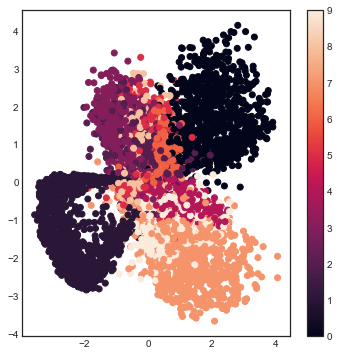

In [ ]:
# Plot of the digit classes in the latent space
x_te_latent = encoder.predict(x_te, batch_size=batch_size)
plt.figure(figsize=(6, 6))
plt.scatter(x_te_latent[:, 0], x_te_latent[:, 1], c=y_te)
plt.colorbar()
plt.show()

In [ ]:
# build decoder
decoder_input = Input(shape=(z_dim,))
_z_decoded = z_decoder1(decoder_input)
_z_decoded = z_decoder2(_z_decoded)
_y = y_decoder(_z_decoded)
generator = Model(decoder_input, _y)
generator.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_14 (InputLayer)        (None, 2)                 0         
_________________________________________________________________
dense_8 (Dense)              (None, 128)               384       
_________________________________________________________________
dense_9 (Dense)              (None, 256)               33024     
_________________________________________________________________
dense_10 (Dense)             (None, 784)               201488    
Total params: 234,896
Trainable params: 234,896
Non-trainable params: 0
_________________________________________________________________


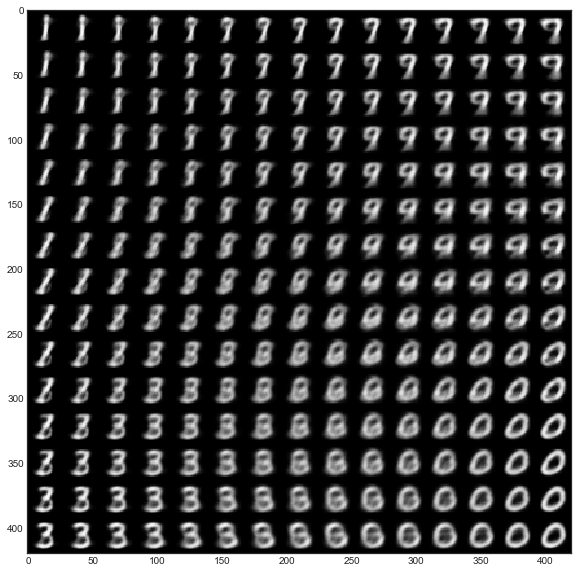

In [ ]:
# display a 2D manifold of the digits
n = 15 # figure with 15x15 digits
digit_size = 28
figure = np.zeros((digit_size * n, digit_size * n))

grid_x = norm.ppf(np.linspace(0.05, 0.95, n)) 
grid_y = norm.ppf(np.linspace(0.05, 0.95, n))

for i, yi in enumerate(grid_x):
    for j, xi in enumerate(grid_y):
        z_sample = np.array([[xi, yi]])
        x_decoded = generator.predict(z_sample)
        digit = x_decoded[0].reshape(digit_size, digit_size)
        figure[i * digit_size: (i + 1) * digit_size,
               j * digit_size: (j + 1) * digit_size] = digit

plt.figure(figsize=(10, 10))
plt.imshow(figure, cmap='Greys_r')
plt.show()